### Seattle weather prediction

#### About Dataset
Explore the intricate climate patterns of the "Emerald City" with the Seattle Weather Dataset. Dive into a comprehensive collection of weather data that unveils the city's renowned reputation for rain and its ever-changing atmospheric conditions. Uncover seasonal trends, precipitation variations, and temperature fluctuations, all encapsulating the unique charm of Seattle's weather. Whether you're a data enthusiast, a climate researcher, or simply curious about the city's meteorological nuances, this dataset provides valuable insights into Seattle's dynamic weather landscape.

#### About this file
Explore the intricate climate patterns of the "Emerald City" with the Seattle Weather Dataset. Dive into a comprehensive collection of weather data that unveils the city's renowned reputation for rain and its ever-changing atmospheric conditions. Uncover seasonal trends, precipitation variations, and temperature fluctuations, all encapsulating the unique charm of Seattle's weather. Whether you're a data enthusiast, a climate researcher, or simply curious about the city's meteorological nuances, this dataset provides valuable insights into Seattle's dynamic weather landscape.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
X=df.iloc[:,1:-1]
# y=df['weather']

In [4]:
X.head()

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1


In [5]:
X.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind'], dtype='object')

In [6]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

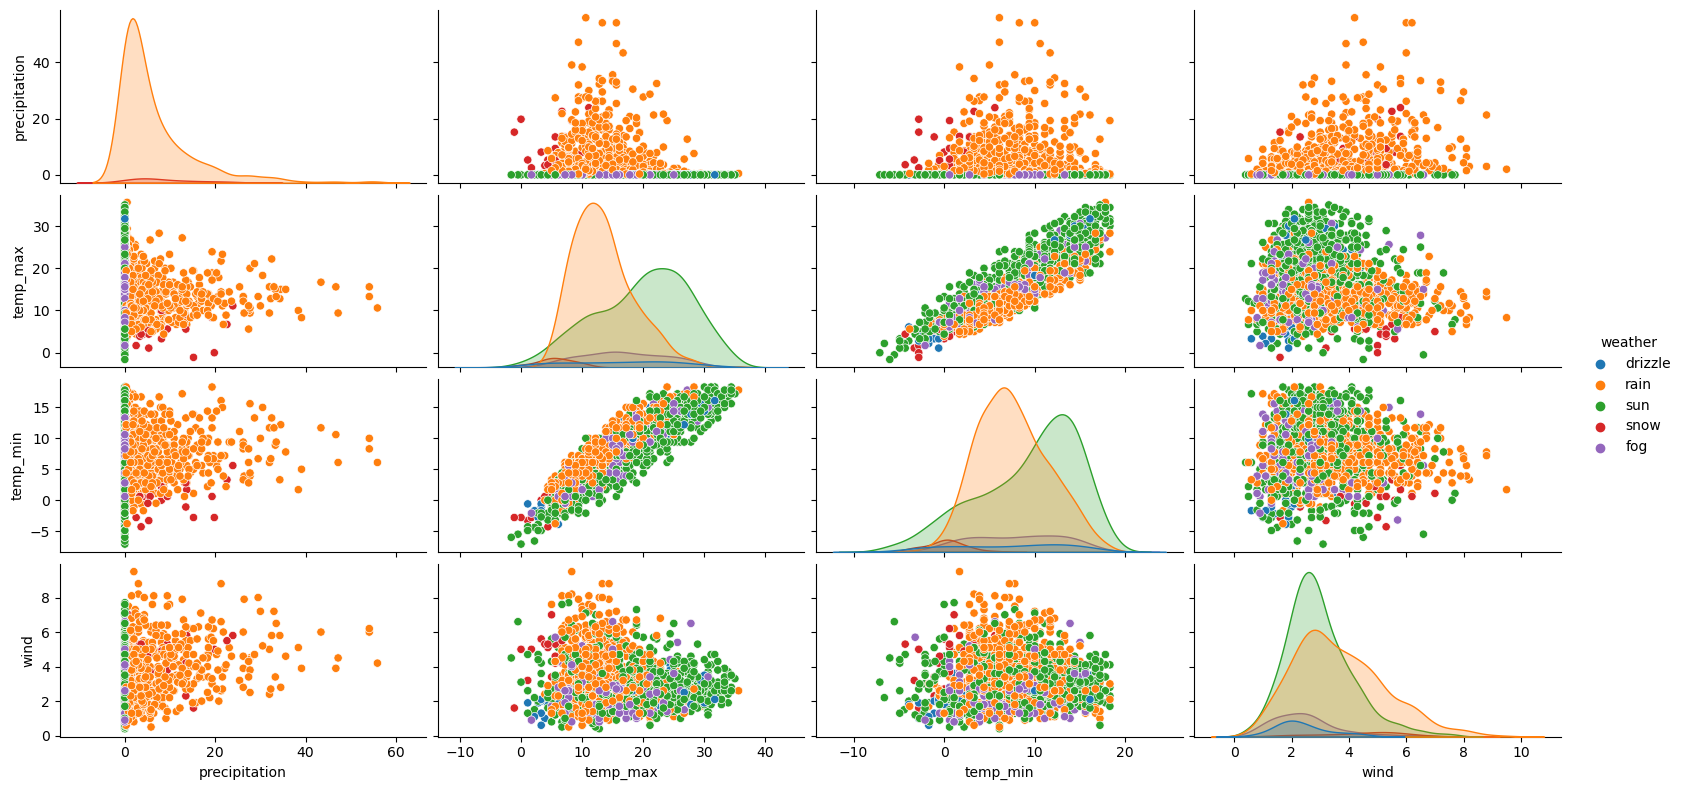

In [7]:
sns.pairplot(df, vars=['precipitation', 'temp_max', 'temp_min', 'wind'],
                height=2, aspect=2, hue='weather')

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [10]:
mapping={'drizzle':0, 'rain':1, 'sun':2, 'snow':3, 'fog':4}
df['weather']=df['weather'].map(mapping)
df['weather'].head()

0    0
1    1
2    1
3    1
4    1
Name: weather, dtype: int64

In [11]:
y=df['weather']
y.head()

0    0
1    1
2    1
3    1
4    1
Name: weather, dtype: int64

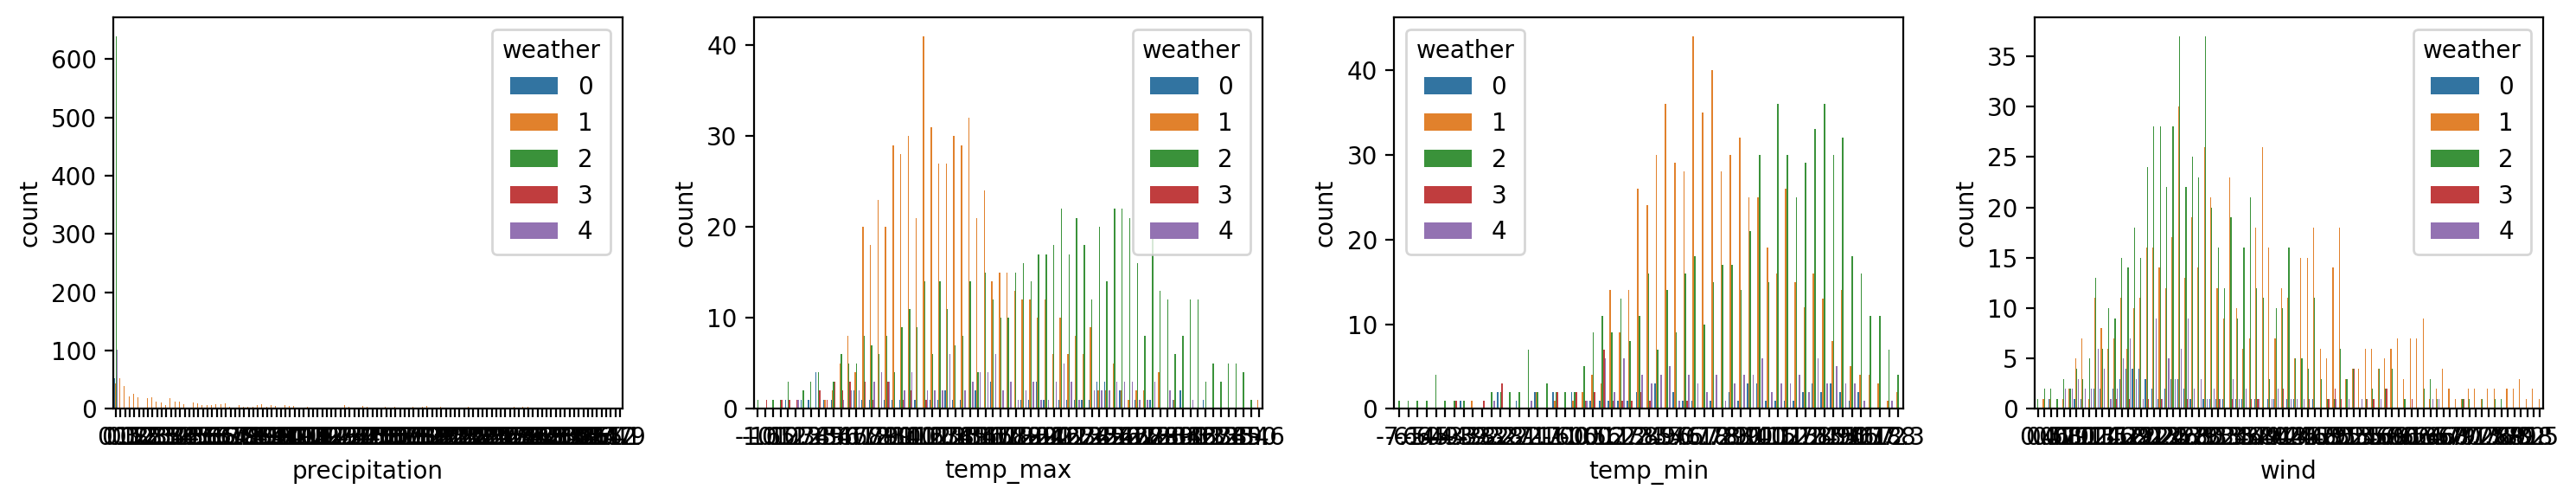

In [12]:
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['figure.dpi'] = 200

fig,ax = plt.subplots(1,4)
sns.countplot(x='precipitation', data=X, ax=ax[0], hue=y)
sns.countplot(x='temp_max', data=X, ax=ax[1], hue=y)
sns.countplot(x='temp_min', data=X, ax=ax[2], hue=y)
sns.countplot(x='wind', data=X, ax=ax[3], hue=y)


plt.tight_layout()

In [13]:
y.unique()

array([0, 1, 2, 3, 4], dtype=int64)

<AxesSubplot:xlabel='weather', ylabel='count'>

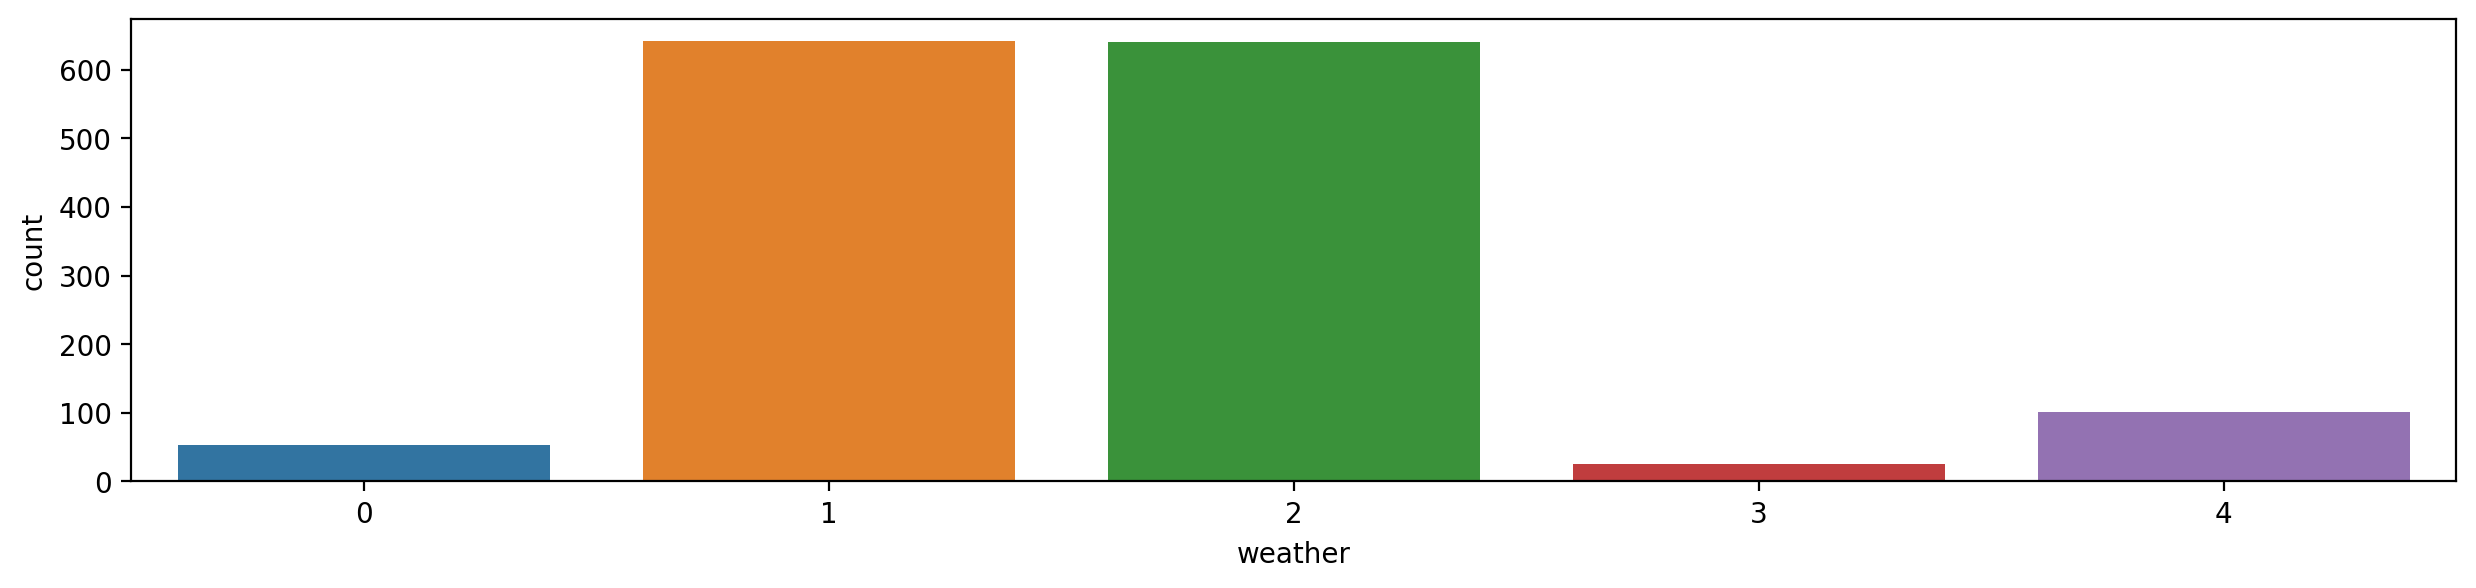

In [14]:
sns.countplot(x=y)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=42, stratify=y)

In [16]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_train =pd.DataFrame(X_train)
# round(X_train.describe(),)

In [17]:
# plt.rcParams['figure.figsize'] = (15, 3)
# plt.rcParams['figure.dpi'] = 200

# fig,ax = plt.subplots(1,4)
# sns.countplot(x='precipitation', data=X_train, ax=ax[0], hue=y)
# sns.countplot(x='temp_max', data=X, ax=ax[1], hue=y)
# sns.countplot(x='temp_min', data=X, ax=ax[2], hue=y)
# sns.countplot(x='wind', data=X, ax=ax[3], hue=y)


# plt.tight_layout()

### Model

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, InputLayer

from tensorflow.keras.optimizers import Adam

In [19]:
X_train

,precipitation,temp_max,temp_min,wind
588,0.0,25.0,14.4,2.9
1298,0.0,23.9,13.9,2.8
759,21.6,11.1,7.2,3.4
437,2.3,11.7,9.4,3.7
686,5.3,11.7,7.2,5.4
...,...,...,...,...
1211,0.0,15.6,4.4,2.7
1318,0.0,30.0,16.7,4.4
872,0.0,24.4,11.7,2.5
463,0.8,13.3,6.1,3.1


In [20]:
input_shape = X_train.shape[1:]
input_shape

(4,)

In [21]:
class_weight = y.value_counts().to_dict()
class_weight

{1: 641, 2: 640, 4: 101, 0: 53, 3: 26}

In [22]:
total_sample = sum(class_weight.values())

class_weight = [total_sample/(len(class_weight)*class_weight[0]),
 total_sample/(len(class_weight)*class_weight[1])]

In [23]:
class_weight

[5.513207547169811, 0.45585023400936037]

In [24]:
model = Sequential()
model.add(InputLayer(input_shape))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='tanh'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 1381 (5.39 KB)
Trainable params: 1381 (5.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
sum([4*128 + 128, 128*128+128, 5*128+5])

17797

In [27]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy',
             metrics=['accuracy'])

In [28]:
class_weight = {0:5.513207547169811, 1:0.45585023400936037}

In [29]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
33/33 [==============================] - 1s 10ms/step - loss: 11.6485 - accuracy: 0.0057 - val_loss: 7.3957 - val_accuracy: 0.0000e+00
Epoch 2/10
33/33 [==============================] - 0s 3ms/step - loss: 4.2662 - accuracy: 0.0086 - val_loss: 2.0074 - val_accuracy: 0.0342
Epoch 3/10
33/33 [==============================] - 0s 3ms/step - loss: -3.3212 - accuracy: 0.1808 - val_loss: -9.8734 - val_accuracy: 0.2479
Epoch 4/10
33/33 [==============================] - 0s 3ms/step - loss: -8.4769 - accuracy: 0.0885 - val_loss: -11.6191 - val_accuracy: 0.0598
Epoch 5/10
33/33 [==============================] - 0s 3ms/step - loss: -9.1373 - accuracy: 0.0343 - val_loss: -12.0482 - val_accuracy: 0.0513
Epoch 6/10
33/33 [==============================] - 0s 3ms/step - loss: -9.3095 - accuracy: 0.0314 - val_loss: -12.2057 - val_accuracy: 0.0513
Epoch 7/10
33/33 [==============================] - 0s 3ms/step - loss: -9.3980 - accuracy: 0.0324 - val_loss: -12.3022 - val_accuracy: 0.0513


<AxesSubplot:>

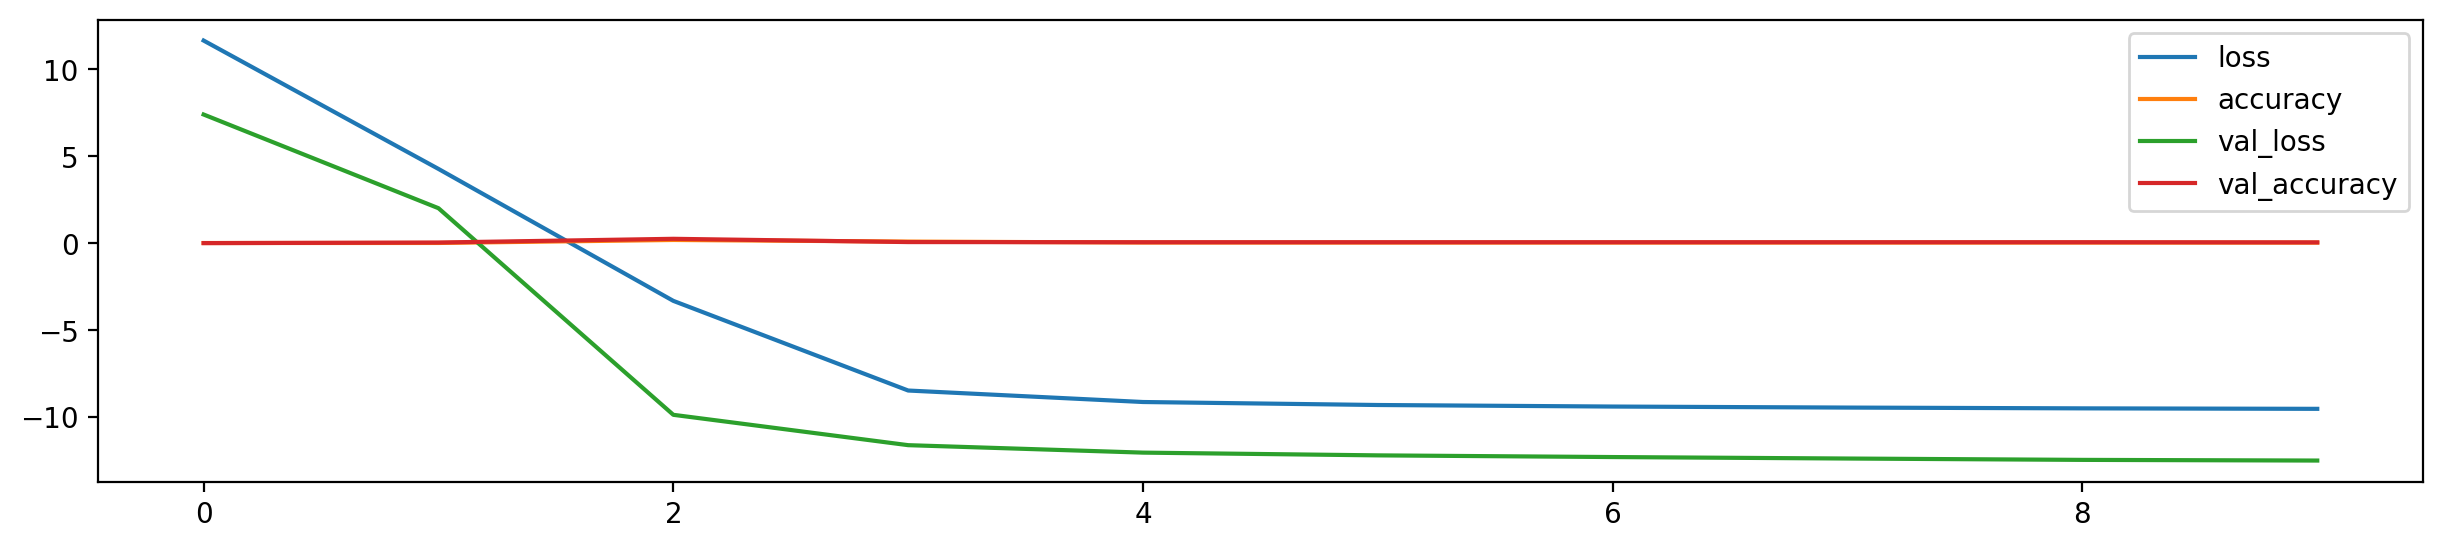

In [30]:
hist = pd.DataFrame(history.history)
hist.plot()

In [31]:
from sklearn.metrics import classification_report

In [32]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [33]:
# print(classification_report(y_test, y_pred))

In [34]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.90      0.89      0.90       120
           2       0.77      0.79      0.78       131
           3       0.38      0.38      0.38         8
           4       0.24      0.20      0.22        25

    accuracy                           0.74       293
   macro avg       0.46      0.45      0.45       293
weighted avg       0.75      0.74      0.74       293



In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.11      0.14         9
           1       0.93      0.93      0.93       120
           2       0.77      0.93      0.84       131
           3       0.50      0.25      0.33         8
           4       0.33      0.08      0.13        25

    accuracy                           0.81       293
   macro avg       0.55      0.46      0.48       293
weighted avg       0.77      0.81      0.78       293



In [98]:
model = Sequential()
model.add(InputLayer(input_shape))
model.add(Dense(100, activation='tanh'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(125, activation='tanh'))
# model.add(Dense(625, activation='tanh'))
# model.add(Dense(125, activation='tanh'))
# model.add(Dense(32, activation='relu'))
model.add(Dense(25, activation='tanh'))
model.add(Dense(5, activation='tanh'))

In [99]:
# help(activation)

In [100]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 100)               500       
                                                                 
 dense_69 (Dense)            (None, 25)                2525      
                                                                 
 dense_70 (Dense)            (None, 5)                 130       
                                                                 
Total params: 3155 (12.32 KB)
Trainable params: 3155 (12.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [101]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy',
             metrics=['accuracy'])

In [102]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
33/33 [==============================] - 1s 8ms/step - loss: 4.0320 - accuracy: 0.2360 - val_loss: 2.6003 - val_accuracy: 0.3162
Epoch 2/10
33/33 [==============================] - 0s 3ms/step - loss: 2.1867 - accuracy: 0.2959 - val_loss: 1.7042 - val_accuracy: 0.2735
Epoch 3/10
33/33 [==============================] - 0s 3ms/step - loss: 1.3692 - accuracy: 0.3920 - val_loss: 1.0168 - val_accuracy: 0.4103
Epoch 4/10
33/33 [==============================] - 0s 3ms/step - loss: 0.5910 - accuracy: 0.4424 - val_loss: 0.1520 - val_accuracy: 0.4017
Epoch 5/10
33/33 [==============================] - 0s 3ms/step - loss: -0.2517 - accuracy: 0.4396 - val_loss: -0.8265 - val_accuracy: 0.4017
Epoch 6/10
33/33 [==============================] - 0s 3ms/step - loss: -1.0530 - accuracy: 0.4396 - val_loss: -1.4436 - val_accuracy: 0.4017
Epoch 7/10
33/33 [==============================] - 0s 4ms/step - loss: -1.7319 - accuracy: 0.4415 - val_loss: -2.0843 - val_accuracy: 0.4103
Epoch 8/10
33/